In [2]:
import mlflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as met
from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import mlxtend as ml
plt.style.use("fivethirtyeight")
import datetime

from IPython.display import Image

!mlflow server --backend-store-uri Challenge/ --default-artifact-root Challenge/ --host 0.0.0.0 --port 5000

In [3]:
mlflow.set_tracking_uri("http://0.0.0.0:5000")

In [4]:
mlflow.get_tracking_uri()

'http://0.0.0.0:5000'

# Ml Flow with Fashion Minst Dataset:

In [5]:
# client = mlflow.tracking.MlflowClient()
mlflow.set_experiment("Ml Flow with Fashion Minst Dataset")
# client.set_experiment_tag(experiment_id, "Mlflow.framework", "Mlflow")

INFO: 'Ml Flow with Fashion Minst Dataset' does not exist. Creating a new experiment


# # Auto Log Experiments:

In [6]:
(x_train_full,y_train_full),(x_test_full,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
x_train_val,x_train = x_train_full[0:4000]/255, x_train_full[4000:]/255
y_train_val,y_train = y_train_full[0:4000], y_train_full[4000:]
x_test_full = x_test_full /255

In [60]:
model4_gass = tf.keras.models.Sequential()
model4_gass.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model4_gass.add(tf.keras.layers.GaussianNoise(0.1))
model4_gass.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))           
model4_gass.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass.add(tf.keras.layers.Dense(10,activation="softmax"))

In [61]:
learning_rate=0.001
model4_gass.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [10]:
mlflow.tensorflow.autolog()
with mlflow.start_run():
    add_reg_drop_gass_history = model4_gass.fit(x_train,y_train,batch_size=256,epochs=100,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/100
219/219 [==============================] - 9s 28ms/step - loss: 1.1487 - accuracy: 0.5984 - val_loss: 0.5451 - val_accuracy: 0.8043
Epoch 2/100
219/219 [==============================] - 5s 21ms/step - loss: 0.7101 - accuracy: 0.7484 - val_loss: 0.4712 - val_accuracy: 0.8345
Epoch 3/100
219/219 [==============================] - 5s 22ms/step - loss: 0.6261 - accuracy: 0.7801 - val_loss: 0.4432 - val_accuracy: 0.8443
Epoch 4/100
219/219 [==============================] - 5s 23ms/step - loss: 0.5860 - accuracy: 0.7938 - val_loss: 0.4250 - val_accuracy: 0.8460
Epoch 5/100
219/219 [==============================] - 5s 23ms/step - loss: 0.5581 - accuracy: 0.8059 - val_loss: 0.4038 - val_accuracy: 0.8533
Epoch 6/100
219/219 [==============================] - 5s 22ms/step - loss: 0.5295 - accuracy: 0.8135 - val_loss: 0.4076 - val_accuracy: 0.8553
Epoch 7/100
219/219 [==============================] - 5s 22ms/step - loss: 0.5335 - accuracy: 0.8155 - val_loss: 0.4116 - val_accuracy:

Epoch 56/100
219/219 [==============================] - 5s 21ms/step - loss: 0.3794 - accuracy: 0.8660 - val_loss: 0.3584 - val_accuracy: 0.8790
Epoch 57/100
219/219 [==============================] - 4s 20ms/step - loss: 0.3766 - accuracy: 0.8682 - val_loss: 0.3666 - val_accuracy: 0.8760
Epoch 58/100
219/219 [==============================] - 4s 20ms/step - loss: 0.3775 - accuracy: 0.8671 - val_loss: 0.3653 - val_accuracy: 0.8735
Epoch 59/100
219/219 [==============================] - 4s 20ms/step - loss: 0.3716 - accuracy: 0.8671 - val_loss: 0.3653 - val_accuracy: 0.8758
Epoch 60/100
219/219 [==============================] - 4s 20ms/step - loss: 0.3803 - accuracy: 0.8671 - val_loss: 0.3672 - val_accuracy: 0.8758
Epoch 61/100
219/219 [==============================] - 4s 20ms/step - loss: 0.3753 - accuracy: 0.8674 - val_loss: 0.3701 - val_accuracy: 0.8765
Epoch 62/100
219/219 [==============================] - 5s 21ms/step - loss: 0.3666 - accuracy: 0.8699 - val_loss: 0.3656 - val_ac

In [3]:
Image(url="https://i.imgur.com/Ostw4na.png")

In [4]:
Image(url="https://i.imgur.com/HSGpsRg.png")

In [5]:
Image(url="https://i.imgur.com/TXUa1FT.png")

In [9]:
Image(url="https://i.imgur.com/3wXY1x2.png")

In [7]:
Image(url="https://i.imgur.com/M26ejV1.png")

In [16]:
%load_ext tensorboard
%tensorboard --logdir mlruns/1/3a3b6a5fa8e849c387d9f2f2b2f16e9c/artifacts/tensorboard_logs/

In [17]:
Image(url="https://i.imgur.com/CLOQCrb.png")

In [18]:
Image(url="https://i.imgur.com/0fd4nnL.png")

In [19]:
Image(url="https://i.imgur.com/tUryGW2.png")

In [21]:
Image(url="https://i.imgur.com/tucreVT.png")

# MlFlow with Fashion Minst Dataset auto_log with custom_log

In [11]:
mlflow.set_experiment("Ml Flow with Fashion Minst Dataset auto_log with custom_log")

Epoch 1/100
219/219 [==============================] - 14s 56ms/step - loss: 1.1677 - accuracy: 0.5786 - val_loss: 0.5715 - val_accuracy: 0.7952
Epoch 2/100
219/219 [==============================] - 8s 38ms/step - loss: 0.7210 - accuracy: 0.7399 - val_loss: 0.4862 - val_accuracy: 0.8375
Epoch 3/100
219/219 [==============================] - 8s 36ms/step - loss: 0.6406 - accuracy: 0.7731 - val_loss: 0.4550 - val_accuracy: 0.8430
Epoch 4/100
219/219 [==============================] - 8s 37ms/step - loss: 0.6034 - accuracy: 0.7872 - val_loss: 0.4423 - val_accuracy: 0.8465
Epoch 5/100
219/219 [==============================] - 9s 40ms/step - loss: 0.5716 - accuracy: 0.7996 - val_loss: 0.4375 - val_accuracy: 0.8495
Epoch 6/100
219/219 [==============================] - 8s 37ms/step - loss: 0.5537 - accuracy: 0.8075 - val_loss: 0.4247 - val_accuracy: 0.8553
Epoch 7/100
219/219 [==============================] - 8s 37ms/step - loss: 0.5448 - accuracy: 0.8097 - val_loss: 0.4061 - val_accuracy

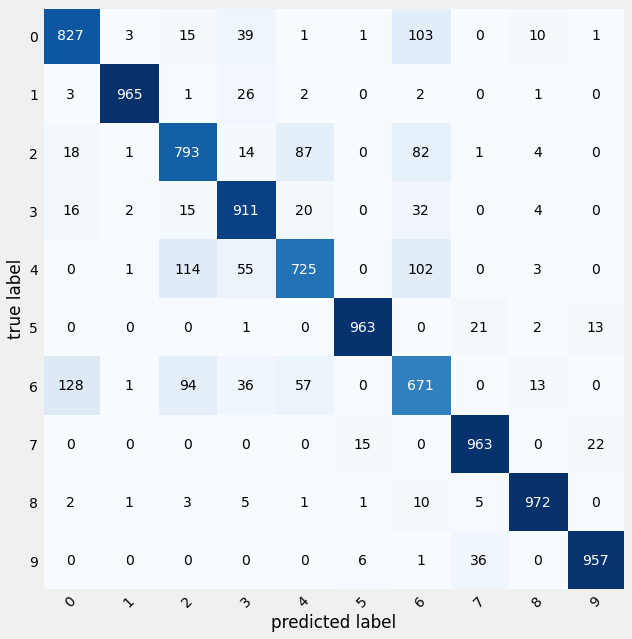

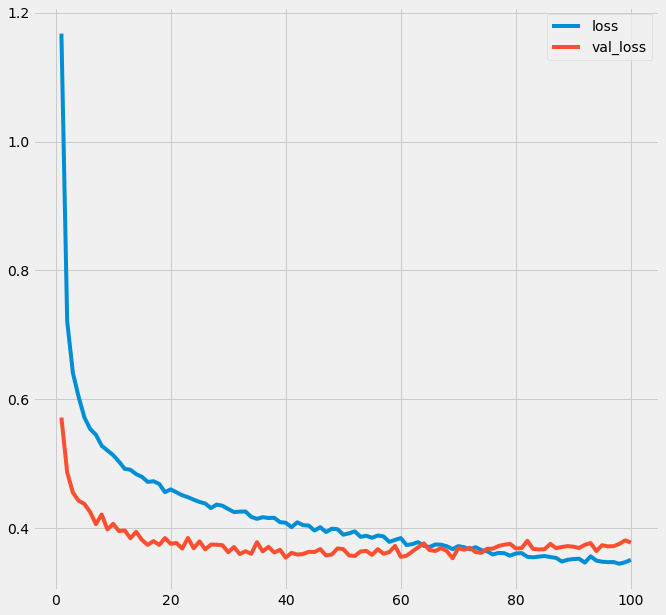

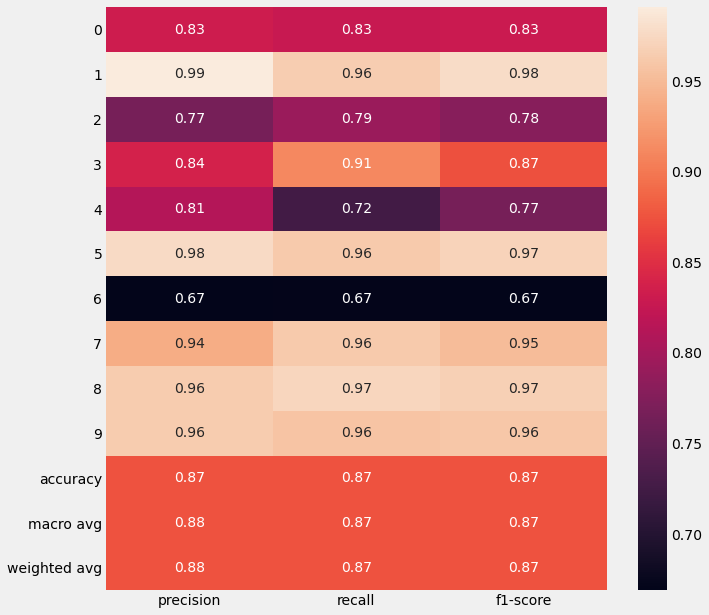

In [62]:
batch_size = 256
epochs = 100
mlflow.tensorflow.autolog()
with mlflow.start_run():
    add_reg_drop_gass_history = model4_gass.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_train_val,y_train_val))
    
    eval_accuracy = model4_gass.evaluate(x_train, y_train)[1]
    
    print(eval_accuracy)
    
    prediction = model4_gass.predict(x_test_full)
    
    pred_argmax = np.argmax(prediction,axis=1)
    
    mlflow.log_param('learning_rate',learning_rate)
    
    fig , ax = ml.plotting.plot_confusion_matrix(met.confusion_matrix(y_test,pred_argmax),figsize=(10,10),class_names=np.unique(y_test))

    fig.savefig("plot_confusion_matrix.png")
    
    mlflow.log_artifact("plot_confusion_matrix.png")

    mlflow.log_metric("eval_accuracy", eval_accuracy)
    
    mlflow.log_metric("f1_score", met.f1_score(y_test,pred_argmax,
                                               average="weighted"))
    
    mlflow.log_metric("precision_score",met.precision_score(y_test,pred_argmax,
                                                            average="weighted"))
    mlflow.log_metric("recall_score", met.recall_score(y_test,pred_argmax,
                                                       average="weighted"))

    mlflow.log_dict(add_reg_drop_gass_history.history,"history")
    
    plt.subplots(figsize=(10,10))
    
    plt.plot(np.arange(1,epochs+1),add_reg_drop_gass_history.history["loss"],label="loss")
    
    plt.plot(np.arange(1,epochs+1),add_reg_drop_gass_history.history["val_loss"], label="val_loss")
    
    plt.legend()
    
    plt.savefig("val_loss&loss.png")
    
    mlflow.log_artifact("val_loss&loss.png")
    
    plt.subplots(figsize=(10,10))
    
    sns.heatmap(pd.DataFrame(met.classification_report(y_test, pred_argmax,output_dict=True)).T.iloc[:,:-1],annot=True) 
    
    plt.savefig("classification_report.png")
    
    mlflow.log_artifact("classification_report.png")
    
#     mlflow.keras.log_model(model4_gass, "fashion_minst_model",registered_model_name="Fashion Minst Model")

In [10]:
Image(url="https://i.imgur.com/1qK1d0X.png")

In [22]:
Image(url="https://i.imgur.com/2eheQsW.png")

In [23]:
Image(url="https://i.imgur.com/iwTIShC.png")

# Ml Flow with Number Minst Dataset With auto Log:

In [4]:
mlflow.set_experiment("Ml Flow with Number Minst Dataset With auto Log")

In [5]:
(x_train_full,y_train_full),(x_test_full,y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
x_train_val,x_train = x_train_full[0:4000]/255, x_train_full[4000:]/255
y_train_val,y_train = y_train_full[0:4000], y_train_full[4000:]
x_test_full = x_test_full /255

In [12]:
model4_gass_minst = tf.keras.models.Sequential()
model4_gass_minst.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model4_gass.add(tf.keras.layers.GaussianNoise(0.1))
model4_gass_minst.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass_minst.add(tf.keras.layers.GaussianDropout(0.5))           
model4_gass_minst.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal'))
model4_gass_minst.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass_minst.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass_minst.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass_minst.add(tf.keras.layers.Dense(10,activation="softmax"))

In [14]:
learning_rate=0.001
model4_gass_minst.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [15]:
# stopping = tf.keras.callbacks.EarlyStopping(patience=7,verbose=1,restore_best_weights=True)
ACCURACY_THRESHOLD = 0.95
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, epoch, logs=None): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print(f"\nReached {logs.get('accuracy')}'>'{ACCURACY_THRESHOLD*100} accuracy, so stopping training!!")   
            self.model.stop_training = True        

In [23]:
mlflow.tensorflow.autolog()
with mlflow.start_run():
    add_reg_drop_gass_history_auto_log= model4_gass_minst.fit(x_train,y_train,batch_size=256,
                                                              epochs=100,verbose=1,
                                                              validation_data=(x_train_val,y_train_val),
                                                             callbacks=[CustomCallBack()])

Epoch 1/100
219/219 [==============================] - 2s 9ms/step - loss: 1.0373 - accuracy: 0.6598 - val_loss: 0.2904 - val_accuracy: 0.9178
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4857 - accuracy: 0.8575 - val_loss: 0.2190 - val_accuracy: 0.9390
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 0.3932 - accuracy: 0.8888 - val_loss: 0.1885 - val_accuracy: 0.9442
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 0.3427 - accuracy: 0.9046 - val_loss: 0.1660 - val_accuracy: 0.9555
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 0.3180 - accuracy: 0.9114 - val_loss: 0.1563 - val_accuracy: 0.9563
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 0.2931 - accuracy: 0.9180 - val_loss: 0.1491 - val_accuracy: 0.9595
Epoch 7/100
219/219 [==============================] - 2s 9ms/step - loss: 0.2759 - accuracy: 0.9236 - val_loss: 0.1366 - val_accuracy: 0.9620

In [3]:
Image(url="https://i.imgur.com/hc5g1Po.png")

In [4]:
Image(url="https://i.imgur.com/VR0S55a.png")

In [5]:
Image(url="https://i.imgur.com/J7SecH1.png")

In [6]:
Image(url="https://i.imgur.com/TbSPa8M.png")

In [7]:
Image(url="https://i.imgur.com/hOKhP7D.png")

In [12]:
%load_ext tensorboard
%tensorboard --logdir mlruns/3/0010442e87d74ea889fa5c825fe4ba7a/artifacts/tensorboard_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
Image(url="https://i.imgur.com/9Vkbx7R.png")

In [15]:
Image(url="https://i.imgur.com/1Z9FO3k.png")

In [16]:
Image(url="https://i.imgur.com/9VNFUm3.png")

In [17]:
Image(url="https://i.imgur.com/wPDVXPa.png")

# Ml Flow with Number Minst Dataset With Custom Log & Auto Log:

In [10]:
mlflow.set_experiment("Ml Flow with Number Minst Dataset With Custom Log & Auto Log")

Epoch 1/100
219/219 [==============================] - 7s 26ms/step - loss: 1.0571 - accuracy: 0.6484 - val_loss: 0.2956 - val_accuracy: 0.9175
Epoch 2/100
219/219 [==============================] - 5s 22ms/step - loss: 0.4809 - accuracy: 0.8591 - val_loss: 0.2056 - val_accuracy: 0.9455
Epoch 3/100
219/219 [==============================] - 5s 22ms/step - loss: 0.3900 - accuracy: 0.8906 - val_loss: 0.1775 - val_accuracy: 0.9510
Epoch 4/100
219/219 [==============================] - 5s 22ms/step - loss: 0.3432 - accuracy: 0.9038 - val_loss: 0.1609 - val_accuracy: 0.9553
Epoch 5/100
219/219 [==============================] - 5s 22ms/step - loss: 0.3121 - accuracy: 0.9131 - val_loss: 0.1516 - val_accuracy: 0.9592
Epoch 6/100
219/219 [==============================] - 6s 25ms/step - loss: 0.2903 - accuracy: 0.9189 - val_loss: 0.1418 - val_accuracy: 0.9638
Epoch 7/100
219/219 [==============================] - 5s 23ms/step - loss: 0.2753 - accuracy: 0.9239 - val_loss: 0.1412 - val_accuracy:

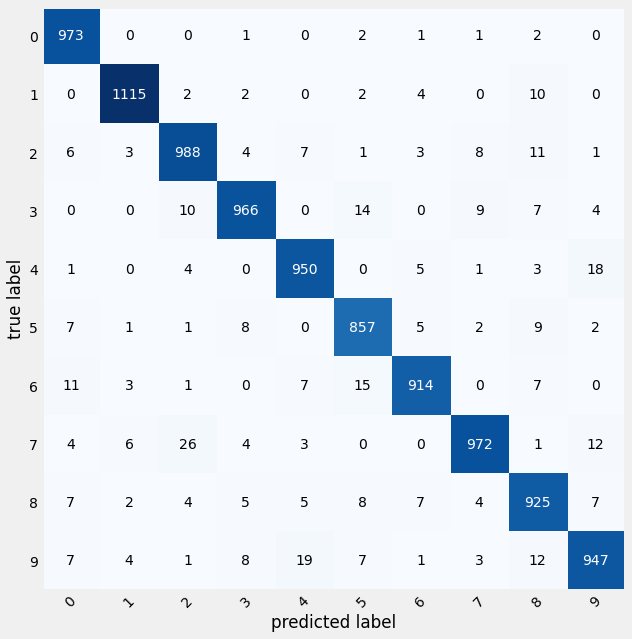

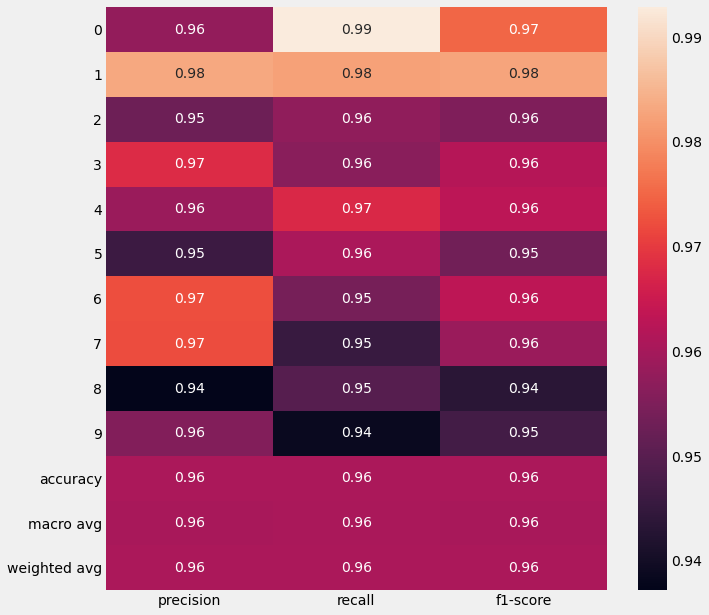

In [16]:
batch_size = 256
epochs = 100
mlflow.tensorflow.autolog()
with mlflow.start_run():
    add_reg_drop_gass_history_cust_auto = model4_gass_minst.fit(x_train,y_train,
                                                                batch_size=batch_size,
                                                                epochs=epochs,verbose=1,
                                                                validation_data=(x_train_val,y_train_val),
                                                               callbacks=[CustomCallBack()])
    
    eval_accuracy = model4_gass_minst.evaluate(x_train, y_train)[1]
    
    print(eval_accuracy)
    
    prediction = model4_gass_minst.predict(x_test_full)
    
    pred_argmax = np.argmax(prediction,axis=1)
    
    mlflow.log_param('learning_rate',learning_rate)
    
    fig , ax = ml.plotting.plot_confusion_matrix(met.confusion_matrix(y_test,pred_argmax),figsize=(10,10),class_names=np.unique(y_test))

    fig.savefig("plot_confusion_matrix.png")
    
    mlflow.log_artifact("plot_confusion_matrix.png")

    mlflow.log_metric("eval_accuracy", eval_accuracy)
    
    mlflow.log_metric("f1_score", met.f1_score(y_test,pred_argmax,
                                               average="weighted"))
    
    mlflow.log_metric("precision_score",met.precision_score(y_test,pred_argmax,
                                                            average="weighted"))
    mlflow.log_metric("recall_score", met.recall_score(y_test,pred_argmax,
                                                       average="weighted"))

    mlflow.log_dict(add_reg_drop_gass_history_cust_auto.history,"history")
    
#     plt.subplots(figsize=(10,10))
    
#     plt.plot(np.arange(1,epochs+1),add_reg_drop_gass_history_cust_auto.history["loss"],label="loss")
    
#     plt.plot(np.arange(1,epochs+1),add_reg_drop_gass_history_cust_auto.history["val_loss"], label="val_loss")
    
# #     plt.legend()
    
# #     plt.savefig("val_loss&loss.png")
    
#     mlflow.log_artifact("val_loss&loss.png")
    
    plt.subplots(figsize=(10,10))
    
    sns.heatmap(pd.DataFrame(met.classification_report(y_test, pred_argmax,output_dict=True)).T.iloc[:,:-1],annot=True) 
    
    plt.savefig("classification_report.png")
    
    mlflow.log_artifact("classification_report.png")
    
#     mlflow.keras.log_model(model4_gass, "fashion_minst_model",registered_model_name="Fashion Minst Model")

In [18]:
Image(url="https://i.imgur.com/QMiXsDA.png")